# Operações pontuais em imagens 

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

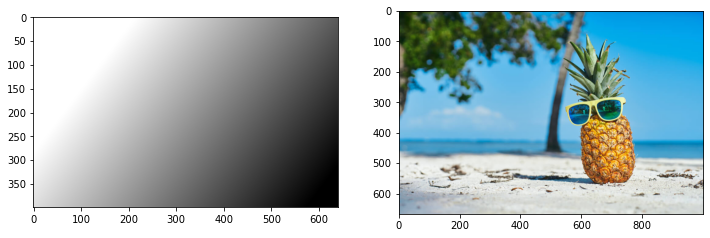

In [2]:
path = 'images/'

img1 = cv2.imread(path + 'quote2.png')
img2 = cv2.imread(path + 'praia.jpg')


plt.figure(figsize=(12, 12)) #definido o tamanho 12 x 12 para apresentar a figura

plt.subplot(121) # plot de imagens uma linha, duas colunas, imagem 1. 
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
#plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
#plt.axis('off')

## Redução da dimensão da imagem

(667, 1000, 3)

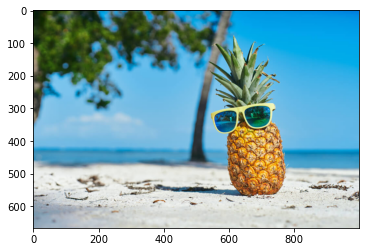

In [3]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
#plt.axis('off')
img2.shape

(333, 500, 3)

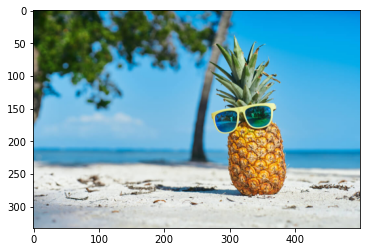

In [4]:
scale_percent = 50 # porcentagem da imagem original
width = int(img2.shape[1] * scale_percent / 100)
height = int(img2.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
#plt.axis('off')
resized.shape

## Aumentando a dimensão da imagem

(1334, 2000, 3)

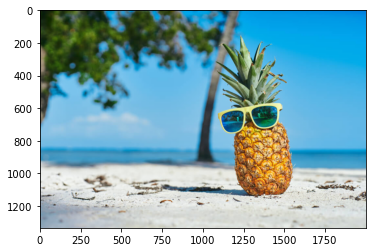

In [5]:
scale_percent = 200 # porcentagem da imagem original
width = int(img2.shape[1] * scale_percent / 100)
height = int(img2.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
#plt.axis('off')
resized.shape

## Conversão da imagem colorida para nível de cinza

(-0.5, 999.5, 666.5, -0.5)

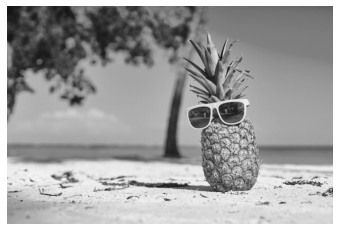

In [6]:
img_pb = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
plt.imshow(cv2.cvtColor(img_pb, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Obtenção do negativo de uma imagem

A transformação negativa é dada por: $$T(r) = 255 - r$$

In [7]:
# Demonstração da inversão (obtenção do negativo) de 256 pixeis
r = np.arange(256)
r_inver = 255 - r

Podemos visualizar essas transformações por meio de funções traçadas num gráfico em que o eixo r indica o valor de entrada e um segundo eixo indica o valor resultante. Por exemplo, a inversão:

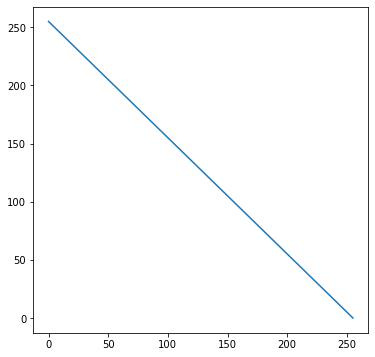

In [8]:
plt.figure(figsize = (6, 6))
plt.plot(r, r_inver)

In [9]:
# Obtenção do negativo de imagens
img1_inv = 255 - img1
img2_inv = 255 - img2
img_pb_inv = 255 - img_pb

(-0.5, 639.5, 399.5, -0.5)

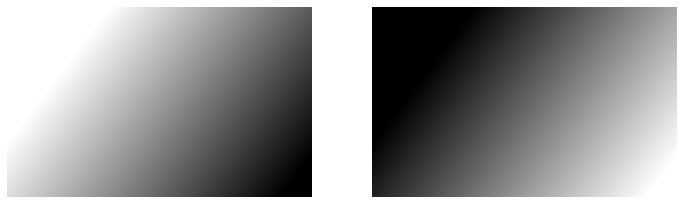

In [10]:
plt.figure(figsize = (12, 12)) 

plt.subplot(121)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img1_inv, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 999.5, 666.5, -0.5)

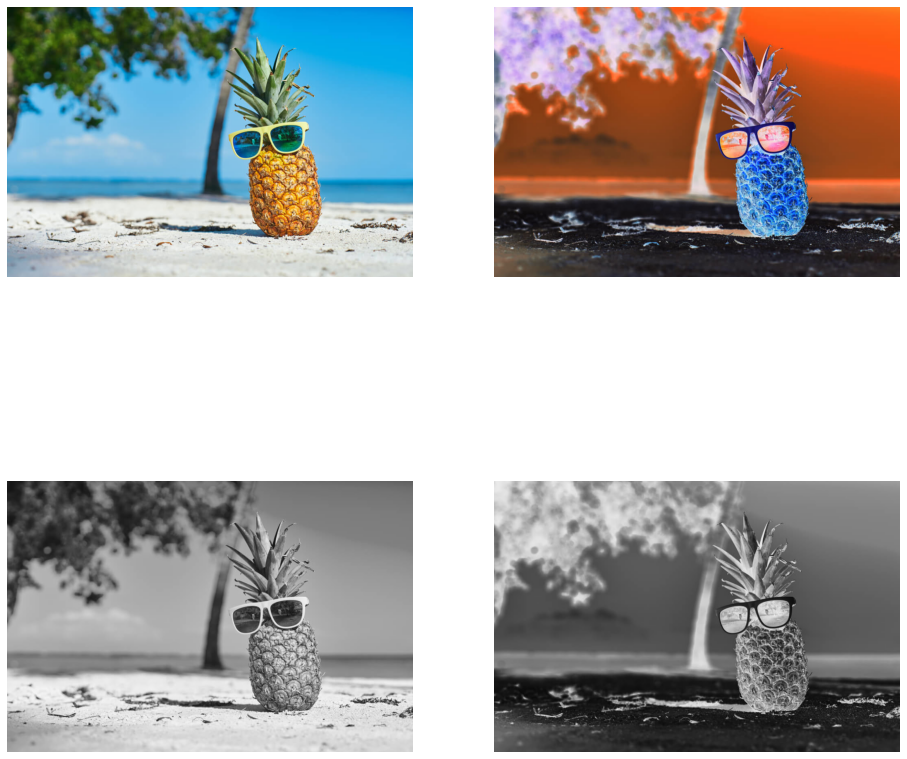

In [11]:
plt.figure(figsize=(16,16)) 

plt.subplot(221)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(222)
plt.imshow(cv2.cvtColor(img2_inv, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(223)
plt.imshow(cv2.cvtColor(img_pb, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(224)
plt.imshow(cv2.cvtColor(img_pb_inv, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Ajuste de contraste

(-0.5, 999.5, 666.5, -0.5)

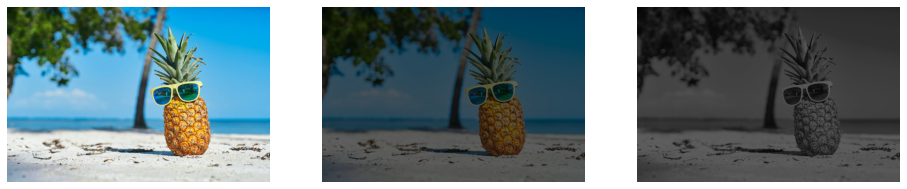

In [12]:
plt.figure(figsize = (16, 16))
img_norm = cv2.normalize(img2, None, 0, 100, cv2.NORM_MINMAX)
img_norm_pb = cv2.normalize(img_pb, None, 0, 100, cv2.NORM_MINMAX)

plt.subplot(231)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(232)
plt.imshow(cv2.cvtColor(img_norm, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(233)
plt.imshow(cv2.cvtColor(img_norm_pb, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 999.5, 666.5, -0.5)

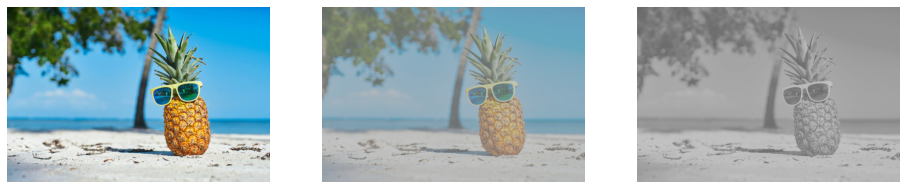

In [13]:
plt.figure(figsize = (16, 16))
img_norm = cv2.normalize(img2, None, 100, 200, cv2.NORM_MINMAX)
img_norm_pb = cv2.normalize(img_pb, None, 100, 200, cv2.NORM_MINMAX)

plt.subplot(231)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(232)
plt.imshow(cv2.cvtColor(img_norm, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(233)
plt.imshow(cv2.cvtColor(img_norm_pb, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Transformação por operador logarítimico

As funções matemáticas são úteis para aprimorar as imagens.

A função $ \ log $, por exemplo, reduz a faixa de valores entre os níveis de cinza para que os pixels escuros se tornem mais brilhantes, sem saturar os pixels já brilhantes.

No entanto, é importante encontrar uma transformação baseada em log para mapear valores entre 0 e 255 para valores também no mesmo intervalo. 

Se apenas aplicarmos um log, por exemplo, usando a base 2:
$$ s = \ log_2 (z) $$
assumindo $$ z = 256 $$, teríamos:

$$ s = \ log_2 (256) = 8 $$

o que reduz consideravelmente a faixa de valores dos níveis de cinza, dificultando a visualização da imagem.

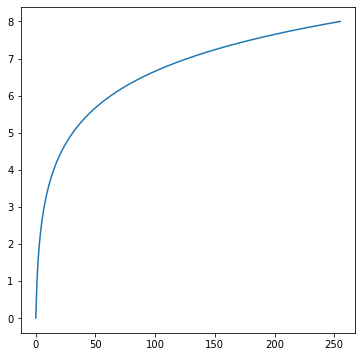

In [14]:
z = np.arange(256)
z_log2 = np.log2(z + 1)
plt.figure(figsize = (6, 6))
plt.plot(z, z_log2)

Precisamos de fator de correção para redimensionar a saída para a desejada. Este fator é definido como: $$ \frac {255} {\ log_2 (1 + R)} $$ em que $ R $ são os níveis máximos de cinza na imagem redimensionada, por exemplo, 255

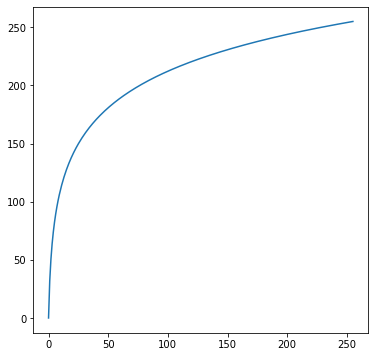

In [15]:
c_scale = 255 / (np.log2(1 + 255))

z_log2 = c_scale * np.log2(z + 1)

#Plotar a figura
plt.figure(figsize=(6,6)) 
plt.plot(z, z_log2)

## Aplicando trandormação por logaritmo em imagem

In [16]:
img_pb = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
#Aplica a função das duas imagens
#np.int32 converte pra inteiro de 32 bits...e o resultado converte pra unsigned int 8.
img1_log2 = (c_scale * np.log2(1 + img1.astype(np.int32))).astype(np.uint8)
img2_log2 = (c_scale * np.log2(1 + img2.astype(np.int32))).astype(np.uint8)
img2_log2_pb = (c_scale * np.log2(1 + img_pb.astype(np.int32))).astype(np.uint8)

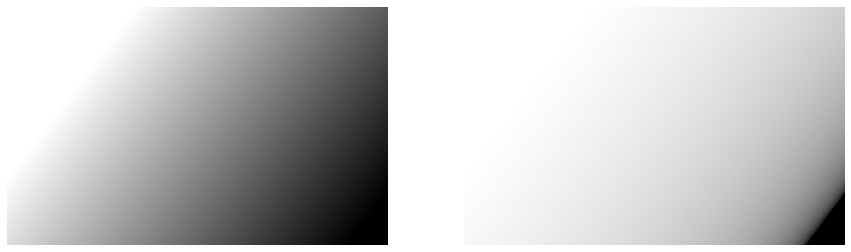

In [17]:
plt.figure(figsize=(15,15)) 
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(122)
plt.axis('off')
plt.imshow(cv2.cvtColor(img1_log2, cv2.COLOR_BGR2RGB))

(-0.5, 999.5, 666.5, -0.5)

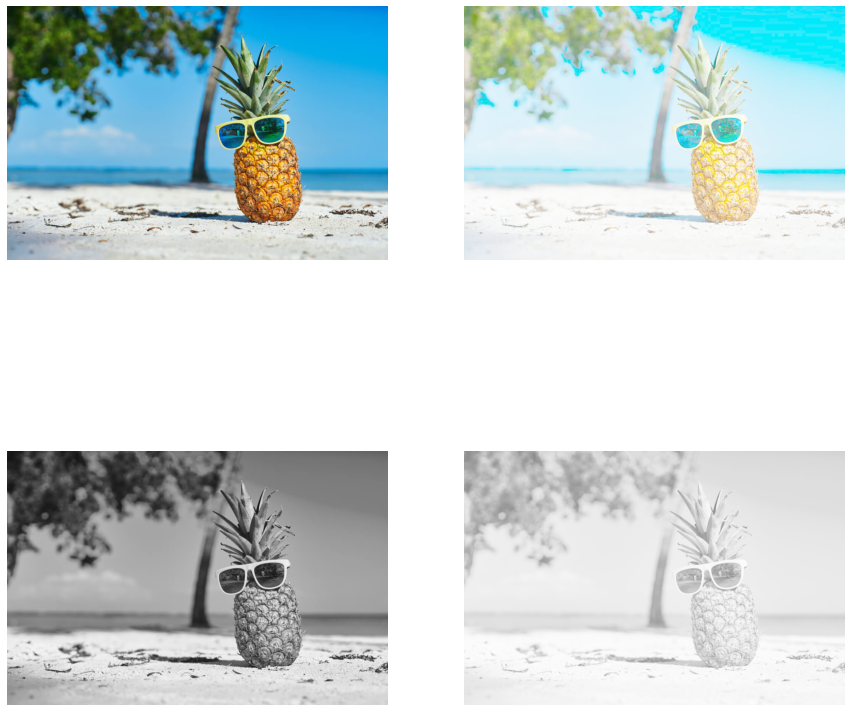

In [18]:
plt.figure(figsize=(15,15)) 
 
plt.subplot(221)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(222)
plt.imshow(cv2.cvtColor(img2_log2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(223)
plt.imshow(cv2.cvtColor(img_pb, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(224)
plt.imshow(cv2.cvtColor(img2_log2_pb, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Realce utilizando histogramas

Ao invés de operar unicamente a partir do valor de um pixel, podemos obter mais informações sobre a imagem de forma a tomar decisões sobre realce. Uma técnica comumente empregada é o histograma, que contém a frequência de cada intensidade presente na imagem. O histograma é obtido contando quantas vezes cada intensidade aparece na imagem

In [19]:
# Exemplo de matriz com números aleatórios
A = np.random.randint(0, 10, [10, 10])
print(A)

[[1 8 4 6 4 8 5 6 7 8]
 [4 7 9 8 8 0 9 1 6 9]
 [0 5 6 1 5 8 3 4 3 3]
 [3 1 4 6 6 8 4 2 1 6]
 [2 3 5 9 7 9 8 7 5 6]
 [1 0 4 5 5 8 8 9 7 0]
 [0 4 8 1 6 0 5 3 1 5]
 [8 9 1 2 1 5 5 6 5 8]
 [2 0 8 3 3 7 3 4 0 8]
 [7 7 6 9 6 6 9 4 5 4]]


Ainda que de forma nao otimizada, uma maneira simples de obter o histograma seria, sabendo o intervalo de valores possiveis na imagem, percorrendo todos os pixels. Vamos criar uma função em python que calcule e retorne o histograma

In [20]:
def histograma(A, nbins):
    N, M = A.shape
    
    # cria histograma vazio, com 'nbins' posições
    hist = np.zeros(nbins).astype(int)

    for x in range(N):
        for y in range(M):
            hist[A[x, y]] += 1 # incrementa histograma no valor A[x,y]
            
    return hist

Exemplo de uso para a função acima

In [21]:
hist_A = histograma(A, 10)
print(hist_A)

[ 8 10  4  9 11 13 13  8 15  9]


O histograma é comumente exibido por meio de um gráfico de barras. Utilizaremos a função plt.bar, que recebe o intervalo e as contagens para exibir os valores

Text(0, 0.5, 'Frequência')

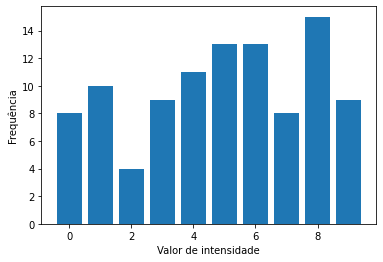

In [22]:
plt.bar(range(10), hist_A)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequência')

Agora vamos calcular o histograma para duas imagens, e exibir os gráficos, da mesma forma que fizemos anteriormente para a matriz. Note a distribuição dos tons de cinza de acordo com sa características de brilho e contraste das imagens.

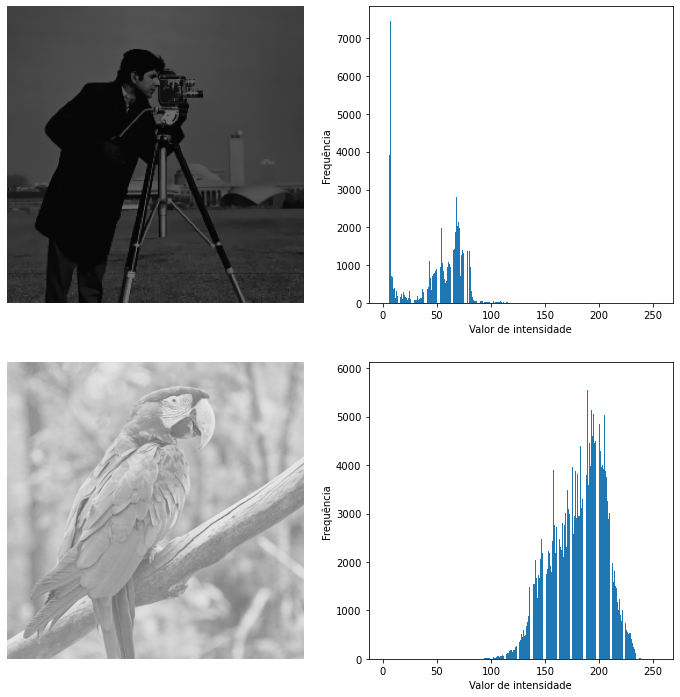

In [23]:
img3 = cv2.imread(path + "cameraman.png")
img4 = cv2.imread(path + "arara.jpg")

# calculamos o histograma considerando a contagem de 256 valores (tons de cinza) 
img3_pb = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img4_pb = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

hist_img1 = histograma(img3_pb, 256)
hist_img2 = histograma(img4_pb, 256)

# exibindo imagens e histogramas (note que uso vmin, vmax para exibir todo o intervalo de tons de cinza)
plt.figure(figsize  = (12, 12)) 
plt.subplot(221)
plt.imshow(img3, vmin = 0, vmax = 255)
plt.axis('off')

plt.subplot(223)
plt.imshow(img4, vmin = 0, vmax = 255)
plt.axis('off')

plt.subplot(222)
plt.bar(range(256), hist_img1)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequência')

plt.subplot(224)
plt.bar(range(256), hist_img2)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequência')
plt.show()

A imagem do Cameraman possui predominância de tons escuros, enquanto a imagem da arara possui muitos pixels de intensidade mais clara. Assim, o histograma oferece a informação da distribuição dos tons de cinza na imagem.

Podemos usar essa informação como base para criar uma transformação (Equalização de Histograma) obtida diretamente a partir dos dados da imagem.

A equalização de histograma utiliza o histograma acumulado para obter uma função de transferência (ou de transformação) para realce da imagem. Note que não estamos projetando manualmente a transformação de realce, mas sim computando diretamente a partir dos dados.

Para isso primeiramente obtemos o histograma cumulativo, e depois escalamos esse histograma cumulativo de forma a obter uma transformação que nos leve do intervalo original de tons de cinza (e.g. 0 - 255), para o mesmo intervalo .

A transformação, para cada valor de pixel r é dada por: $$s = T(r) = \frac{L-1}{MN} hc(r)$$

onde hc é o histograma cumulativo, e hc(r) é o valor do histograma cumulativo para a intensidade r

In [24]:
def histogram_equalization(A, values):
    hist = histograma(A, values)
    
    # cria histograma cumulativo vazio, do mesmo tamanho do histograma 
    histC = np.zeros(hist.shape).astype(int)

    # nova imagem equalizada
    A_eq = np.zeros(A.shape).astype(np.uint8)

    # Obtém histograma cumulativo
    histC[0] = hist[0]
    for i in range(1, values):
        histC[i] = hist[i] + histC[i - 1]

    # tamanho da imagem/matriz    
    N, M = A.shape
    
    # o arranjo abaixo tem a finalidade de armazenar o histograma transformado 
    # A finalidade é apenas para propositos didaticos (iremos visualizar posteriormente)
    hist_transform = np.zeros(values).astype(np.uint8)
    
    # transforma as intensidades de 'A' usando histC como funcao de transferencia para cada tom de cinza
    for r in range(values):
        # computa qual seria o novo valor 's', dado o valor atual 'r' 
        s = ((values - 1) / float(M * N)) * histC[r]
        
        # Para cada pixel de valor r, sbstituí-lo por s
        A_eq[np.where(A == r)] = s
        
        hist_transform[r] = s
    
    return A_eq, hist_transform

Equalizando as imagens. Repare que a equalizacao de histograma tenta deixar o histograma mais proximo do uniformemente distribuido.

In [25]:
img1_eq, img1_transf = histogram_equalization(img3_pb, values = 256)
img2_eq, img2_transf = histogram_equalization(img4_pb, values = 256)

Text(0, 0.5, 'Frequência')

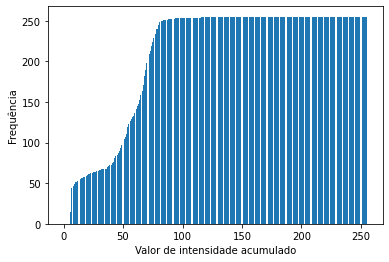

In [26]:
plt.bar(range(256), img1_transf)
plt.xlabel('Valor de intensidade acumulado')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

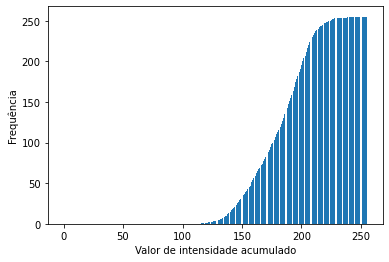

In [27]:
plt.bar(range(256), img2_transf)
plt.xlabel('Valor de intensidade acumulado')
plt.ylabel('Frequência')

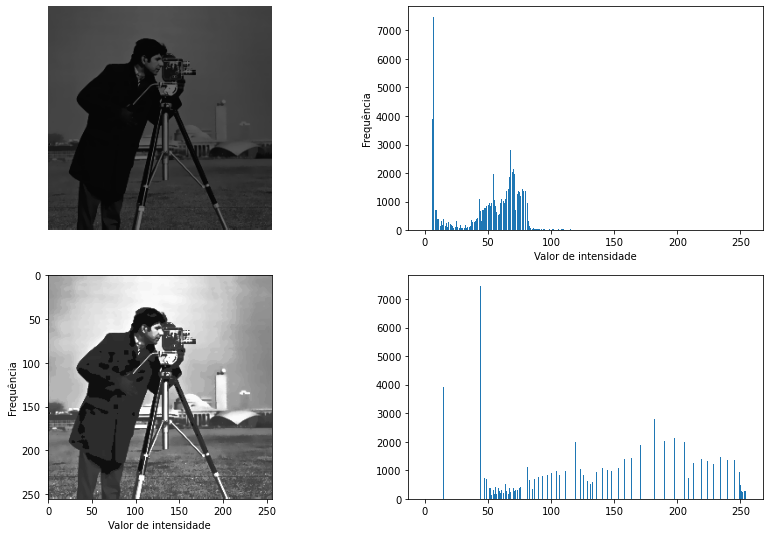

In [28]:
# novos histogramas
histeq_img1 = histograma(img1_eq, 256)
histeq_img2 = histograma(img2_eq, 256)

# exibindo imagens, histogramas e transformacoes

# imagem Cameraman
plt.figure(figsize=(14,14)) 
plt.subplot(321)
plt.imshow(img3, vmin = 0, vmax = 255)
plt.axis('off')

plt.subplot(322)
plt.bar(range(256), hist_img1)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequência')

plt.subplot(323)
plt.imshow(img1_eq, cmap="gray", vmin = 0, vmax = 255)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequência')

plt.subplot(324)
plt.bar(range(256), histeq_img1)
plt.show()


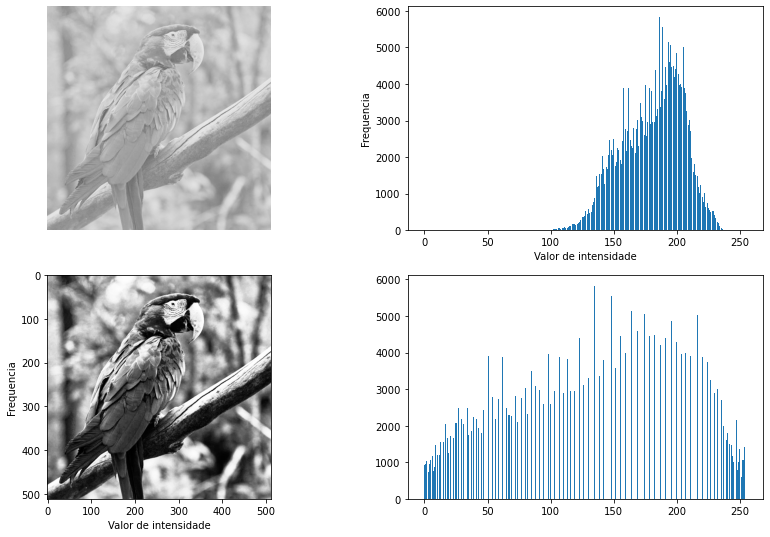

In [29]:
#imagem arara
plt.figure(figsize=(14,14)) 
plt.subplot(321)
plt.imshow(img4, vmin = 0, vmax = 255)
plt.axis('off')         
         
plt.subplot(322)
plt.bar(range(256), hist_img2)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

plt.subplot(323)
plt.imshow(img2_eq, cmap="gray", vmin = 0, vmax = 255)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

plt.subplot(324)
plt.bar(range(256), histeq_img2)
plt.show()

## Realce de histograma no OpenCV

In [30]:
help(cv2.equalizeHist)

Help on built-in function equalizeHist:

equalizeHist(...)
    equalizeHist(src[, dst]) -> dst
    .   @brief Equalizes the histogram of a grayscale image.
    .   
    .   The function equalizes the histogram of the input image using the following algorithm:
    .   
    .   - Calculate the histogram \f$H\f$ for src .
    .   - Normalize the histogram so that the sum of histogram bins is 255.
    .   - Compute the integral of the histogram:
    .   \f[H'_i =  \sum _{0  \le j < i} H(j)\f]
    .   - Transform the image using \f$H'\f$ as a look-up table: \f$\texttt{dst}(x,y) = H'(\texttt{src}(x,y))\f$
    .   
    .   The algorithm normalizes the brightness and increases the contrast of the image.
    .   
    .   @param src Source 8-bit single channel image.
    .   @param dst Destination image of the same size and type as src .



In [31]:
img3_pb = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
imEq = cv2.equalizeHist(img3_pb)
h = cv2.calcHist([img3_pb], [0], None, [256], [0, 256])

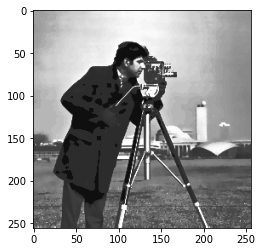

In [36]:
plt.imshow(imEq, cmap="gray", vmin = 0, vmax = 255)

In [ ]:
plt.hist(h.ravel(),bins = 256, range = [0,256]) 
plt.xlim([0, 256])
plt.show()